# Warning; make sure you have > 64 GB RAM if you want to execute this notebook.

## No need to execute this again if ran on my Pasteur graviton instance, I've pickled the results

In [1]:
# this one parses the Logan table and get aggregates
# let's see how quick this is, and how painful in terms of costs
# well, it's not fast. 2 minutes for 2.7M entries
# 41 minutes total for 27M

import boto3

# Initialize a DynamoDB client
dynamodb = boto3.resource('dynamodb')

table = dynamodb.Table('Logan')

from datetime import datetime
startTime = datetime.now()

scan_kwargs = {
       'ProjectionExpression': 'accession, ' + # ARM64_return_value, ARM64_processing_date, ARM64_processing_time, '+
                               'seqstats_contigs_n50, seqstats_contigs_maxlen, seqstats_unitigs_n50, ' +
                               'seqstats_unitigs_maxlen, seqstats_unitigs_sumlen, seqstats_contigs_sumlen, ' +
                               'seqstats_unitigs_nbseq, seqstats_contigs_nbseq'
       }

# a smaller version
scan_kwargs = {
       'ProjectionExpression': 'accession, ' +
                               'seqstats_contigs_n50, seqstats_unitigs_n50, ' +
                               'seqstats_unitigs_sumlen, seqstats_contigs_sumlen'
       }

#print("accession,seqstats_unitigs_nbseq,seqstats_unitigs_sumlen")
"""
# Structure to hold accession counts and instance types
sum_input = 0
all_items = []
while True:
    response = table.scan(**scan_kwargs)
    items = response['Items']

    for item in items:
        accession = item['accession']
        sum_input += 1
        if 'seqstats_contigs_n50' not in item or 'seqstats_unitigs_n50' not in item: continue
        #print(f"{item['accession']},{item['seqstats_unitigs_nbseq'},{item['seqstats_unitigs_sumlen']}")
        all_items += [item]

    # Check if there are more items to fetch
    if 'LastEvaluatedKey' in response:
        scan_kwargs['ExclusiveStartKey'] = response['LastEvaluatedKey']
    else:
        break  # Exit the loop if no more items
print(datetime.now() - startTime,"minutes:seconds")

print("nb items:",sum_input)

import pickle

# Save the all_items object to a file
with open('all_items.pkl', 'wb') as f:
    pickle.dump(all_items, f)
"""

'\n# Structure to hold accession counts and instance types\nsum_input = 0\nall_items = []\nwhile True:\n    response = table.scan(**scan_kwargs)\n    items = response[\'Items\']\n\n    for item in items:\n        accession = item[\'accession\']\n        sum_input += 1\n        if \'seqstats_contigs_n50\' not in item or \'seqstats_unitigs_n50\' not in item: continue\n        #print(f"{item[\'accession\']},{item[\'seqstats_unitigs_nbseq\'},{item[\'seqstats_unitigs_sumlen\']}")\n        all_items += [item]\n\n    # Check if there are more items to fetch\n    if \'LastEvaluatedKey\' in response:\n        scan_kwargs[\'ExclusiveStartKey\'] = response[\'LastEvaluatedKey\']\n    else:\n        break  # Exit the loop if no more items\nprint(datetime.now() - startTime,"minutes:seconds")\n\nprint("nb items:",sum_input)\n\nimport pickle\n\n# Save the all_items object to a file\nwith open(\'all_items.pkl\', \'wb\') as f:\n    pickle.dump(all_items, f)\n'

## Just run this:

In [1]:
import pickle

# Load the all_items object from a file
with open('all_items.pkl', 'rb') as f:
    all_items = pickle.load(f)


In [2]:
print(all_items[:5])

[{'seqstats_contigs_n50': '205', 'seqstats_contigs_sumlen': '8081', 'seqstats_unitigs_n50': '92', 'accession': 'ERR12325358', 'seqstats_unitigs_sumlen': '18065'}, {'seqstats_contigs_n50': '37', 'seqstats_contigs_sumlen': '219856', 'seqstats_unitigs_n50': '37', 'accession': 'SRR19715583', 'seqstats_unitigs_sumlen': '8266318'}, {'seqstats_contigs_n50': '39', 'seqstats_contigs_sumlen': '1666', 'seqstats_unitigs_n50': '36', 'accession': 'ERR2013044', 'seqstats_unitigs_sumlen': '548078'}, {'seqstats_contigs_n50': '6619', 'seqstats_contigs_sumlen': '11866521', 'seqstats_unitigs_n50': '290', 'accession': 'ERR926299', 'seqstats_unitigs_sumlen': '19214968'}, {'seqstats_contigs_n50': '4646', 'seqstats_contigs_sumlen': '12322422', 'seqstats_unitigs_n50': '45', 'accession': 'ERR9817895', 'seqstats_unitigs_sumlen': '55758775'}]


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_items' is your array
# Extracting 'seqstats_unitigs_n50' values from the array
u_n50_values = [item.get('seqstats_unitigs_n50') for item in all_items if 'seqstats_unitigs_n50' in item]
# Converting string values to integers
u_n50_values = [int(n50) for n50 in u_n50_values if n50 is not None]

In [5]:
# Adjusting the plot with a logarithmic x-axis
plt.figure(figsize=(6, 3))
sns.histplot(u_n50_values, bins=50, kde=False, log_scale=True)
plt.title('Histogram of Unitigs N50 - Log Scale')
plt.xlabel('Unitigs N50 (Log Scale)')
plt.ylabel('Frequency')

plt.show()

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_items' is your array
# Extracting 'seqstats_unitigs_n50' values from the array
c_n50_values = [item.get('seqstats_contigs_n50') for item in all_items  if 'seqstats_contigs_n50' in item]
# Converting string values to integers
c_n50_values = [int(n50) for n50 in c_n50_values if n50 is not None]

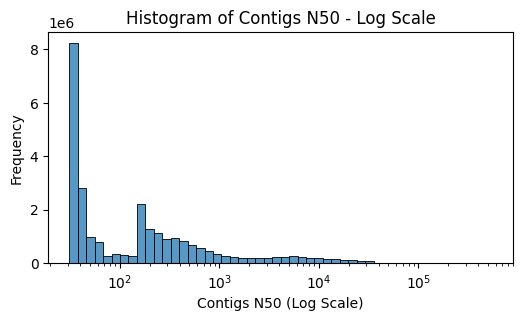

In [7]:
# Adjusting the plot with a logarithmic x-axis
plt.figure(figsize=(6, 3))
sns.histplot(c_n50_values, bins=50, kde=False, log_scale=True)
plt.title('Histogram of Contigs N50 - Log Scale')
plt.xlabel('Contigs N50 (Log Scale)')
plt.ylabel('Frequency')

plt.show()

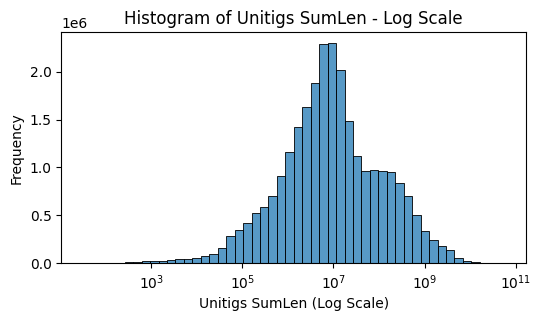

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_items' is your array
# Extracting 'seqstats_unitigs_n50' values from the array
u_sumlen = [item.get('seqstats_unitigs_sumlen') for item in all_items if 'seqstats_unitigs_sumlen' in item]
# Converting string values to integers
u_sumlen = [int(sumlen) for sumlen in u_sumlen if sumlen is not None]
# Adjusting the plot with a logarithmic x-axis
plt.figure(figsize=(6, 3))
sns.histplot(u_sumlen, bins=50, kde=False, log_scale=True)
plt.title('Histogram of Unitigs SumLen - Log Scale')
plt.xlabel('Unitigs SumLen (Log Scale)')
plt.ylabel('Frequency')

plt.show()

In [3]:
import zstandard as zstd
import csv, io

# Initialize an empty dictionary to store acc and mbases
acc_mbases_dict = {}

# Assuming the file path is '../Athena_Dec_10_public.csv.zst'
file_path = '../Athena_Dec_10_public.csv.zst'

# Open the zstd file and decompress it while reading
with open(file_path, 'rb') as compressed:
    dctx = zstd.ZstdDecompressor()
    with dctx.stream_reader(compressed) as reader:
        text_stream = io.TextIOWrapper(reader, encoding='utf-8')
        csvreader = csv.DictReader(text_stream)
        for row in csvreader:
            acc_mbases_dict[row['acc']] = row['mbases']


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_items' is your array
# Extracting 'seqstats_unitigs_n50' values from the array
u_ratio = [float(item.get('seqstats_unitigs_sumlen'))/1000000.0/float(acc_mbases_dict[item.get('accession')]) for item in all_items if 'seqstats_unitigs_sumlen' in item and item.get('seqstats_unitigs_sumlen') is not None and int(acc_mbases_dict[item.get('accession')]) > 0]



/tmp/ipykernel_3280/4170296520.py:7: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  h.set_xlim(0.001,0)


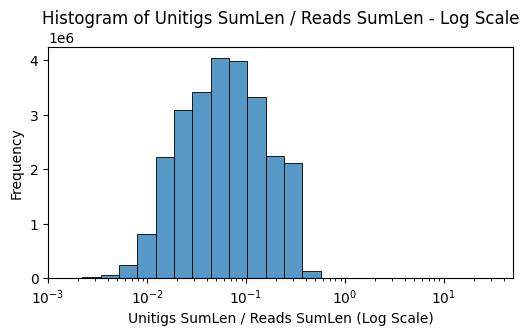

In [11]:
# Adjusting the plot with a logarithmic x-axis
plt.figure(figsize=(6, 3))
h = sns.histplot(u_ratio, bins=50, kde=False, log_scale=True)
plt.title('Histogram of Unitigs SumLen / Reads SumLen - Log Scale')
plt.xlabel('Unitigs SumLen / Reads SumLen (Log Scale)')
plt.ylabel('Frequency')
h.set_xlim(0.001,0)
plt.show()

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'all_items' is your array
# Extracting 'seqstats_unitigs_n50' values from the array
c_ratio = [float(item.get('seqstats_contigs_sumlen'))/1000000.0/float(acc_mbases_dict[item.get('accession')]) for item in all_items if 'seqstats_contigs_sumlen' in item and item.get('seqstats_contigs_sumlen') is not None and int(acc_mbases_dict[item.get('accession')]) > 0]

# Adjusting the plot with a logarithmic x-axis
plt.figure(figsize=(6, 3))
h = sns.histplot(c_ratio, bins=50, kde=False, log_scale=True)
plt.title('Histogram of Contigs SumLen / Reads SumLen - Log Scale')
plt.xlabel('Contigs SumLen / Reads SumLen (Log Scale)')
plt.ylabel('Frequency')
h.set_xlim(0.0001,0)
plt.show()

/tmp/ipykernel_3280/4139086037.py:14: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  h.set_xlim(0.0001,0)


# -----------------------


In [13]:
import zstandard as zstd
import csv, io

# Initialize an empty dictionary to store acc and mbases
acc_assay_type = {}

# Assuming the file path is '../Athena_Dec_10_public.csv.zst'
file_path = '../Athena_May_13_assay_type.csv.zst'

# Open the zstd file and decompress it while reading
assay_types = set()
with open(file_path, 'rb') as compressed:
    dctx = zstd.ZstdDecompressor()
    with dctx.stream_reader(compressed) as reader:
        text_stream = io.TextIOWrapper(reader, encoding='utf-8')
        csvreader = csv.DictReader(text_stream)
        for row in csvreader:
            acc_assay_type[row['acc']] = row['assay_type']
            assay_types.add(row['assay_type'])

assay_types

{'\n\t\t\t\tWGS\n\t\t\t',
 'AMPLICON',
 'ATAC-seq',
 'Bisulfite-Seq',
 'CLONE',
 'CLONEEND',
 'CTS',
 'ChIA-PET',
 'ChIP',
 'ChIP-Seq',
 'DNase-Hypersensitivity',
 'EST',
 'FAIRE-seq',
 'FINISHING',
 'FL-cDNA',
 'GBS',
 'Hi-C',
 'Inverse rRNA',
 'MBD-Seq',
 'MNase-Seq',
 'MRE-Seq',
 'MeDIP-Seq',
 'OTHER',
 'POOLCLONE',
 'RAD-Seq',
 'RIP-Seq',
 'RNA-Seq',
 'Ribo-seq',
 'SELEX',
 'Synthetic-Long-Read',
 'Targeted-Capture',
 'Tethered Chromatin Conformation Capture',
 'Tn-Seq',
 'VALIDATION',
 'WCS',
 'WGA',
 'WGS',
 'WXS',
 'miRNA-Seq',
 'ncRNA-Seq',
 'other',
 'ssRNA-seq'}

In [14]:
assay_categories = { 'AMPLICON',
 'WGA',
 'OTHER',
 'Hi-C',
 'RNA-Seq',
 'WGS'}
from collections import Counter
assay_cat_count = Counter()
for acc in acc_assay_type:
    if acc not in acc_mbases_dict: continue
    if acc_assay_type[acc] == 'WGA' or acc_assay_type[acc] == 'WGS':
        assay_cat_count["WGS/WGA"] += 1
    elif "RNA" in acc_assay_type[acc]:
        assay_cat_count["RNA-Seq"] += 1
    elif acc_assay_type[acc] in assay_categories:
        assay_cat_count[acc_assay_type[acc]] += 1
    else:
        assay_cat_count["OTHER"] += 1

print(assay_cat_count)

Counter({'AMPLICON': 12393687, 'WGS/WGA': 5421393, 'RNA-Seq': 5347081, 'OTHER': 4472412, 'Hi-C': 46938})


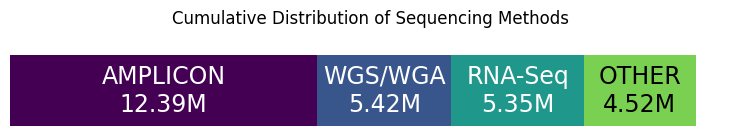

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    'Method': ['AMPLICON', 'WGS/WGA', 'RNA-Seq', 'OTHER'],
    'Count': [12393687, 5421393, 5347081, 4519350]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate the left offsets for each bar segment
lefts = np.cumsum([0] + df['Count'].tolist())[:-1]

# Colors for each segment
colors = plt.get_cmap('viridis')(np.linspace(0, 0.8, len(df)))

# Plot
fig, ax = plt.subplots(figsize=(7.5, 1.5))  # Adjusted for a better display

# Stack each segment in one row
for (method, count, left, color) in zip(df['Method'], df['Count'], lefts, colors):
    ax.barh([0], [count], left=[left], color=color)
    # Add text inside each bar
    text_color = 'white' if count > 5000000 else 'black'  # Adjusting text color for visibility
    ax.text(left + count / 2, 0, f"{method}\n{count/1e6:.2f}M", ha='center', va='center', color=text_color, fontsize=17)


# Remove x-axis
ax.xaxis.set_visible(False)

# Remove y-ticks
ax.set_yticks([])

# Remove the spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Title
ax.set_title('Cumulative Distribution of Sequencing Methods', pad=20)

# Show the plot
plt.tight_layout()
plt.savefig("dynamodb_tigs_stats.plot_sra_count.svg", format="svg")
plt.show()


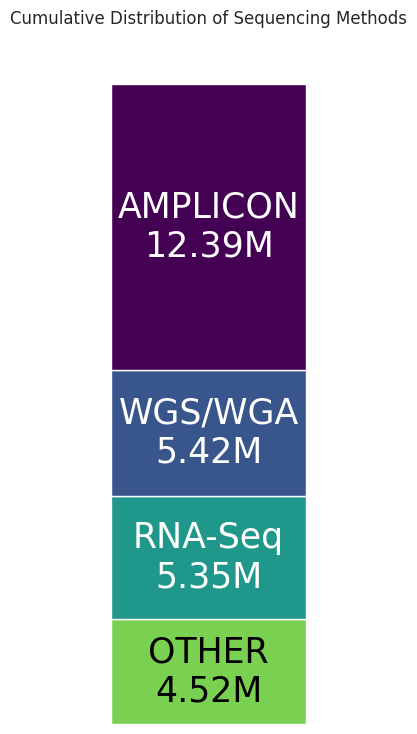

In [77]:
data = {
    'Method': ['AMPLICON', 'WGS/WGA', 'RNA-Seq', 'OTHER'],
    'Count': [12393687, 5421393, 5347081, 4519350]
}
df = pd.DataFrame(data)
# Reverse the DataFrame
df = df.iloc[::-1].reset_index(drop=True)
bottoms = np.cumsum([0] + df['Count'].tolist())[:-1]
colors = plt.get_cmap('viridis')(np.linspace(0, 0.8, len(df)))[::-1]
fig, ax = plt.subplots(figsize=(2.5, 7.5))  # Adjusted for a better display
# Stack each segment in one column
for (method, count, bottom, color) in zip(df['Method'], df['Count'], bottoms, colors):
    ax.bar([0], [count], bottom=[bottom], color=color)
    # Add text inside each bar
    text_color = 'white' if count > 5000000 else 'black'  # Adjusting text color for visibility
    ax.text(0, bottom + count / 2, f"{method}\n{count/1e6:.2f}M", ha='center', va='center', color=text_color, fontsize=25)
ax.yaxis.set_visible(False)
ax.set_xticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_title('Cumulative Distribution of Sequencing Methods', pad=20)
plt.tight_layout()
plt.savefig("dynamodb_tigs_stats.plot_sra_count_vertical.svg", format="svg")
plt.show()

In [17]:
from collections import Counter
assay_categories = { 'AMPLICON',
 'WGA',
 'OTHER',
 'Hi-C',
 'RNA-Seq',
 'WGS'}
assay_cat_size = Counter()
for acc in acc_assay_type:
    if acc not in acc_mbases_dict: continue
    mbases = int(acc_mbases_dict[acc])
    if acc_assay_type[acc] == 'WGA' or acc_assay_type[acc] == 'WGS':
        assay_cat_size["WGS/WGA"] += mbases
    elif "RNA" in acc_assay_type[acc]:
        assay_cat_size["RNA-Seq"] += mbases
    elif acc_assay_type[acc] in assay_categories:
        assay_cat_size[acc_assay_type[acc]] += mbases
    else:
        assay_cat_size["OTHER"] += mbases

print(assay_cat_size)

Counter({'WGS/WGA': 18934327236, 'RNA-Seq': 18230912079, 'OTHER': 8349297427, 'AMPLICON': 3500922029, 'Hi-C': 1218611042})


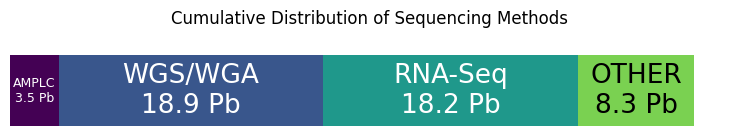

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
data = {
    'Method': ['AMPLICON', 'WGS/WGA', 'RNA-Seq', 'OTHER'],
    'Count': [assay_cat_size[x]/1000/1000/1000 for x in ['AMPLICON', 'WGS/WGA', 'RNA-Seq', 'OTHER']]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate the left offsets for each bar segment
lefts = np.cumsum([0] + df['Count'].tolist())[:-1]

# Colors for each segment
colors = plt.get_cmap('viridis')(np.linspace(0, 0.8, len(df)))

# Plot
fig, ax = plt.subplots(figsize=(7.5, 1.5))  # Adjusted for a better display

# Stack each segment in one row
for (method, count, left, color) in zip(df['Method'], df['Count'], lefts, colors):
    ax.barh([0], [count], left=[left], color=color)
    # Add text inside each bar
    text_color = "white"  # Adjusting text color for visibility
    if method == "OTHER" or method == "AMPLICON": text_color = "black"  # Adjusting text color for visibility
    font_size = 19
    if method == "AMPLICON": 
        font_size = 9
        method = "AMPLC"
        text_color = "white"
    ax.text(left + count / 2, 0, f"{method}\n{count:.1f} Pb", ha='center', va='center', color=text_color, fontsize=font_size)


# Remove x-axis
ax.xaxis.set_visible(False)

# Remove y-ticks
ax.set_yticks([])

# Remove the spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Title
ax.set_title('Cumulative Distribution of Sequencing Methods', pad=20)

# Show the plot
plt.tight_layout()
plt.savefig("dynamodb_tigs_stats.plot_sra_size.svg", format="svg")
plt.show()


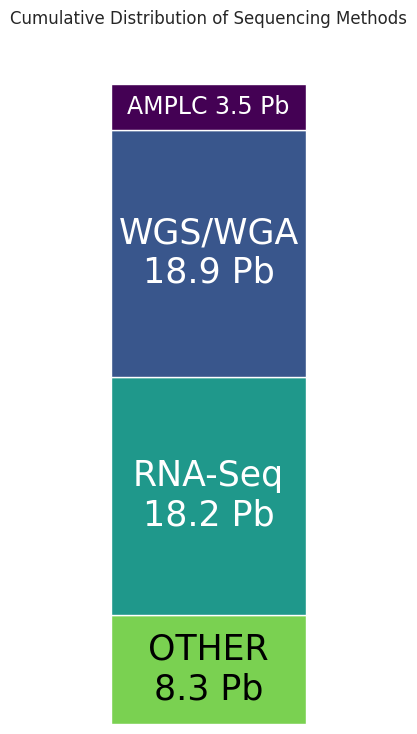

In [85]:

# Data
data = {
    'Method': ['AMPLICON', 'WGS/WGA', 'RNA-Seq', 'OTHER'],
    'Count': [assay_cat_size[x]/1000/1000/1000 for x in ['AMPLICON', 'WGS/WGA', 'RNA-Seq', 'OTHER']]
}
df = pd.DataFrame(data)
df = df.iloc[::-1].reset_index(drop=True)
bottoms = np.cumsum([0] + df['Count'].tolist())[:-1]
colors = plt.get_cmap('viridis')(np.linspace(0, 0.8, len(df)))[::-1]
fig, ax = plt.subplots(figsize=(2.5, 7.5))  # Adjusted for a better display
for (method, count, bottom, color) in zip(df['Method'], df['Count'], bottoms, colors):
    ax.bar([0], [count], bottom=[bottom], color=color)
    # Add text inside each bar
    text_color = "white"  # Adjusting text color for visibility
    if method == "OTHER" or method == "AMPLICON":
        text_color = "black"  # Adjusting text color for visibility
    font_size = 25
    fig_text = f"{method}\n{count:.1f} Pb"
    if method == "AMPLICON": 
        font_size = 17
        method = "AMPLC"
        text_color = "white"
        fig_text = f"{method} {count:.1f} Pb"
    ax.text(0, bottom + count / 2, fig_text, ha='center', va='center', color=text_color, fontsize=font_size)
ax.yaxis.set_visible(False)
ax.set_xticks([])
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_title('Cumulative Distribution of Sequencing Methods', pad=20)
plt.tight_layout()
plt.savefig("dynamodb_tigs_stats.plot_sra_size_vertical_reversed.svg", format="svg")
plt.show()

# ------------------------

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Preparing lists for each column in the DataFrame
n50_values = []
assay_types = []

for item in all_items:
    acc = item['accession']
    n50 = item['seqstats_contigs_n50']
    assay_type = acc_assay_type.get(acc, "OTHER")  # Default to "OTHER" if not found
    
    if assay_type in ['WGA', 'WGS']:
        assay_type = "WGS/WGA"
    elif "RNA" in assay_type:
        assay_type = "RNA-Seq"
    elif assay_type == "AMPLICON":
        continue
    else:
        assay_type = "OTHER"
    
    n50_values.append(int(n50))
    assay_types.append(assay_type)

# Creating DataFrame from the lists
df_n50 = pd.DataFrame({
    'N50': n50_values,
    'Assay Type': assay_types
})


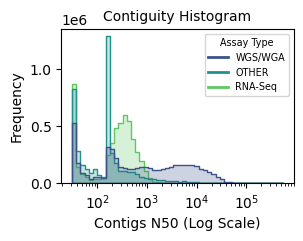

In [21]:

# Plotting with colors per assay type
plt.figure(figsize=(3, 2))
hist_plot = sns.histplot(data=df_n50, x='N50', hue='Assay Type', bins=50, kde=False, log_scale=True, element='step', palette='viridis')
plt.title('Contiguity Histogram', fontsize=10)
plt.xlabel('Contigs N50 (Log Scale)', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
#plt.yscale('log')
# Manually setting the legend
# Manually create legend
assay_types = df_n50['Assay Type'].unique()
handles = [plt.Line2D([0], [0], color=sns.color_palette('viridis', len(assay_types))[i], lw=2) for i in range(len(assay_types))]
labels = assay_types
plt.legend(handles, labels, title='Assay Type', fontsize='x-small', title_fontsize='x-small')

plt.savefig("dynamodb_tigs_stats.plot_n50.svg", format="svg")
plt.show()


In [22]:
import pandas as pd

# Combine data from acc_mbases_dict and all_items
combined_data = []
for item in all_items:
    accession = item['accession']
    if 'seqstats_unitigs_sumlen' not in item: continue
    if 'seqstats_contigs_sumlen' not in item: continue
    if accession in acc_mbases_dict:
        combined_data.append({
            'accession': accession,
            'unitig_sumlen': float(item['seqstats_unitigs_sumlen'])/1000000,
            'contig_sumlen': float(item['seqstats_contigs_sumlen'])/1000000,
            'mbases': int(acc_mbases_dict[accession])
        })

# Create a DataFrame from the combined data
df = pd.DataFrame(combined_data)

In [23]:

# Subsampling the data (e.g., take a random sample of 1000 points)
sample_size = 10000  # Adjust the sample size as needed
if len(df) > sample_size:
    df2 = df.sample(n=sample_size, random_state=1)
#df2=df
print(len(df))

26555466


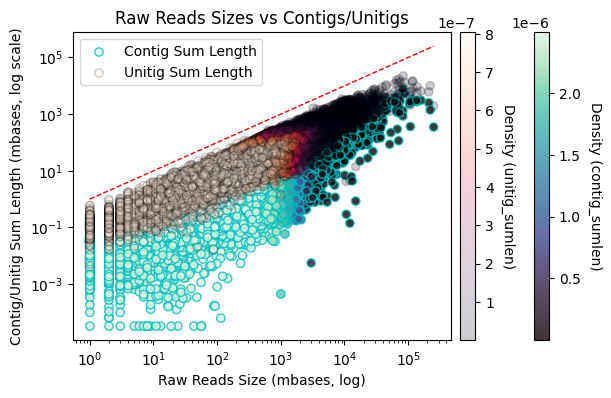

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Assuming df2 is already defined

fig, ax = plt.subplots(figsize=(7, 4))

# For contig_sumlen
values_contig = np.vstack([df2["mbases"], df2["contig_sumlen"]])
kernel_contig = stats.gaussian_kde(values_contig)(values_contig)
scatter_contig = ax.scatter(df2["mbases"], df2["contig_sumlen"], c=kernel_contig, cmap="mako", edgecolor='c', alpha=0.8, label='contig_sumlen')

# For unitig_sumlen
values_unitig = np.vstack([df2["mbases"], df2["unitig_sumlen"]])
kernel_unitig = stats.gaussian_kde(values_unitig)(values_unitig)
scatter_unitig = ax.scatter(df2["mbases"], df2["unitig_sumlen"], c=kernel_unitig, cmap="rocket", edgecolor='k', alpha=0.2, label='unitig_sumlen')

# Setting log scales
ax.set_xscale('log')
ax.set_yscale('log')

# Title and labels
ax.set_title('Raw Reads Sizes vs Contigs/Unitigs')
ax.set_xlabel('Raw Reads Size (mbases, log)')
ax.set_ylabel('Contig/Unitig Sum Length (mbases, log scale)')

# Adding a line y = x
max_val = max(df2['mbases'].max(), df2['unitig_sumlen'].max())
ax.plot([1, max_val], [1, max_val], color='red', linestyle='--', linewidth=1)

# Adding colorbars for hue
cbar_contig = fig.colorbar(scatter_contig, ax=ax, pad=0.01)
cbar_contig.set_label('Density (contig_sumlen)', rotation=270, labelpad=15)

cbar_unitig = fig.colorbar(scatter_unitig, ax=ax, pad=0.02)
cbar_unitig.set_label('Density (unitig_sumlen)', rotation=270, labelpad=15)

plt.legend(handles=[scatter_contig, scatter_unitig], labels=['Contig Sum Length', 'Unitig Sum Length'], loc='upper left')
plt.savefig("dynamodb_tigs_stats.plot_sra_vs_contigs_unitigs.svg", format="svg")
plt.show()


<Figure size 800x800 with 0 Axes>

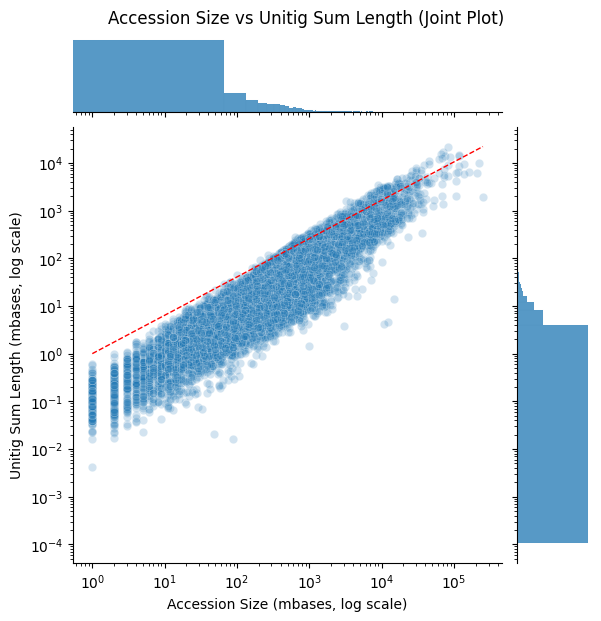

In [25]:
### # Joint plot
plt.figure(figsize=(8, 8))
joint_plot = sns.jointplot(data=df2, x='mbases', y='unitig_sumlen', kind='scatter', alpha=0.2)
joint_plot.ax_joint.plot([1, df2['mbases'].max()], [1, df2['unitig_sumlen'].max()], 'r--', linewidth=1)
joint_plot.set_axis_labels('Accession Size (mbases, log scale)', 'Unitig Sum Length (mbases, log scale)')
plt.xscale('log')
plt.yscale('log')
plt.suptitle('Accession Size vs Unitig Sum Length (Joint Plot)', y=1.02)
plt.show()

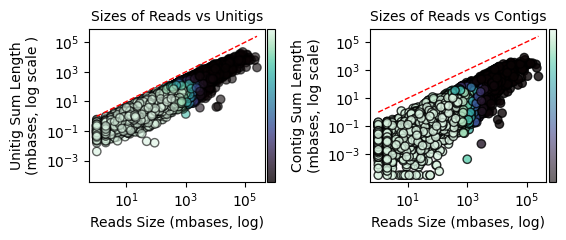

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Assuming df2 is already defined

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2.5))

# For contig_sumlen
values_contig = np.vstack([df2["mbases"], df2["contig_sumlen"]])
kernel_contig = stats.gaussian_kde(values_contig)(values_contig)
scatter_contig = ax2.scatter(df2["mbases"], df2["contig_sumlen"], c=kernel_contig, cmap="mako", edgecolor='k', alpha=0.8, label='contig_sumlen')

# Setting log scales for contig plot
ax2.set_xscale('log')
ax2.set_yscale('log')

# Title and labels for contig plot
ax2.set_title('Sizes of Reads vs Contigs', fontsize=10)
ax2.set_xlabel('Reads Size (mbases, log)', fontsize=10)
ax2.set_ylabel('Contig Sum Length\n(mbases, log scale)', fontsize=10)

# Adding a line y = x for contig plot
max_val_contig = max(df2['mbases'].max(), df2['contig_sumlen'].max())
ax2.plot([1, max_val_contig], [1, max_val_contig], color='red', linestyle='--', linewidth=1)

# Adding colorbar for contig plot
cbar_contig = fig.colorbar(scatter_contig, ax=ax1, pad=0.01)
#cbar_contig.set_label('Density (contig_sumlen)', rotation=270, labelpad=15, fontsize=10)
cbar_contig.ax.tick_params(labelsize=8)  # Decreasing tick label size
cbar_contig.ax.set_yticks([])

# For unitig_sumlen
values_unitig = np.vstack([df2["mbases"], df2["unitig_sumlen"]])
kernel_unitig = stats.gaussian_kde(values_unitig)(values_unitig)
scatter_unitig = ax1.scatter(df2["mbases"], df2["unitig_sumlen"], c=kernel_unitig, cmap="mako", edgecolor='k', alpha=0.6, label='unitig_sumlen')

# Setting log scales for unitig plot
ax1.set_xscale('log')
ax1.set_yscale('log')

# Title and labels for unitig plot
ax1.set_title('Sizes of Reads vs Unitigs', fontsize=10)
ax1.set_xlabel('Reads Size (mbases, log)', fontsize=10)
ax1.set_ylabel('Unitig Sum Length\n(mbases, log scale )', fontsize=10)

# Adding a line y = x for unitig plot
max_val_unitig = max(df2['mbases'].max(), df2['unitig_sumlen'].max())
ax1.plot([1, max_val_unitig], [1, max_val_unitig], color='red', linestyle='--', linewidth=1)

# Adding colorbar for unitig plot
cbar_unitig = fig.colorbar(scatter_unitig, ax=ax2, pad=0.01)
#cbar_unitig.set_label('Density (unitig_sumlen)', rotation=270, labelpad=15, fontsize=10)
#cbar_unitig.ax.tick_params(labelsize=8)  # Decreasing tick label size
#ticks_unitig = cbar_unitig.ax.get_yticks()
#cbar_unitig.ax.set_yticks(ticks_unitig)  # Explicitly setting the ticks
#ticks_unitig_labels = [f'{tick:.1e}' if tick != 1e-6 else '' for tick in ticks_unitig]  # Customize tick labels
#cbar_unitig.ax.set_yticklabels(ticks_unitig, fontsize=8)
cbar_unitig.ax.set_yticks([])


plt.tight_layout()
plt.savefig("dynamodb_tigs_stats.plot_sra_vs_contigs_unitigs_side_by_side.svg", format="svg")
plt.show()

# now, plots for sra content

In [4]:
# sra size
import gzip
import csv

# Initialize an empty dictionary to store the results
submission_year_dict = {}

# Open and read the compressed file
with gzip.open('/home/ec2-user/erc-unitigs-prod/NCBI_SRA_Datalist_20240427.gz', 'rt') as file:
    reader = csv.reader(file, delimiter='\t')
    
    # Skip the header row
    next(reader)
    
    # Iterate through each row in the file
    for row in reader:
        submission = row[1]
        date = row[2]
        year = date.split('-')[0]  # Extract the year from the date
        
        # Add the submission and year to the dictionary
        submission_year_dict[submission] = year
print(list(submission_year_dict.items())[::-1][:5])

[('SRR28822667', '2024'), ('SRR28822666', '2024'), ('SRR28822665', '2024'), ('SRR28822664', '2024'), ('SRR28822663', '2024')]


In [5]:
import matplotlib.pyplot as plt
# Combine the data and compute cumulative size per year
year_size_dict = {}
for submission, year in submission_year_dict.items():
    if submission in acc_mbases_dict:
        if year == "2024": continue
        if year not in year_size_dict:
            year_size_dict[year] = 0
        year_size_dict[year] += int(acc_mbases_dict[submission])

# Sort years and compute cumulative sizes
sorted_years = sorted(year_size_dict.keys())
cumulative_sizes = []
cumulative_size = 0

for year in sorted_years:
    cumulative_size += year_size_dict[year]
    cumulative_sizes.append(cumulative_size)
cumulative_sizes_pb = [float(x)/1000000000 for x in cumulative_sizes]


In [29]:

import matplotlib.pyplot as plt
import seaborn as sns
# Set the Seaborn style without grid
sns.set(style="white")
# Create the plot with a small figure size
plt.figure(figsize=(1.87, 1.87))
sns.lineplot(x=sorted_years, y=cumulative_sizes_pb, marker='o', markersize=5)

# Customize the plot
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=8)
plt.title('SRA Size (Petabases)', fontsize=10)
xticks = sorted_years[2::3]
plt.xticks(xticks, rotation=45, fontsize=8)
yticks = [0,25,50]
plt.yticks(yticks,fontsize=9)
plt.tight_layout()
plt.savefig("dynamodb_tigs_stats.plot_sra_size_pb.svg", format="svg")
# Save the plot to file or show
plt.show()


In [11]:
import matplotlib.pyplot as plt
# Combine the data and compute cumulative size per year
year_acc_dict = {}
for submission, year in submission_year_dict.items():
    if submission in acc_mbases_dict:
        if year == "2024": continue
        if year not in year_acc_dict:
            year_acc_dict[year] = 0
        year_acc_dict[year] += 1

# Sort years and compute cumulative sizes
sorted_years = sorted(year_acc_dict.keys())
cumulative_accs = []
cumulative_acc = 0

for year in sorted_years:
    cumulative_acc += year_acc_dict[year]
    cumulative_accs.append(cumulative_acc)



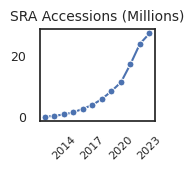

In [13]:
cumulative_accs_mil = [x/1000000 for x in cumulative_accs]
# Set the Seaborn style without grid
sns.set(style="white")
# Create the plot with a small figure size
plt.figure(figsize=(1.87, 1.87))
sns.lineplot(x=sorted_years, y=cumulative_accs_mil, marker='o', markersize=5)

# Customize the plot
plt.xlabel('', fontsize=12)
plt.ylabel('', fontsize=8)
plt.title('SRA Accessions (Millions)', fontsize=10)
xticks = sorted_years[2::3]
plt.xticks(xticks, rotation=45, fontsize=8)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.savefig("dynamodb_tigs_stats.plot_sra_accs.svg", format="svg")
# Save the plot to file or show
plt.show()

In [25]:
# a more vertically compressed version and both side by side

# Set the Seaborn style without grid
sns.set(style="white")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(3.8, 1.5))

# Plot 1: SRA Size (Petabases, Pbp)
sns.lineplot(x=sorted_years, y=cumulative_sizes_pb, marker='o', markersize=5, ax=axs[0])
axs[0].set_title('SRA Size (Petabases, Pbp)', fontsize=9)
axs[0].set_xlabel('', fontsize=12)
axs[0].set_ylabel('', fontsize=8)
axs[0].set_xticks(sorted_years[2::3])
axs[0].tick_params(axis='x', rotation=45, labelsize=7)
axs[0].set_yticks([0, 25, 50])
axs[0].tick_params(axis='y', labelsize=9)

# Plot 2: SRA Accessions (Millions)
sns.lineplot(x=sorted_years, y=cumulative_accs_mil, marker='o', markersize=5, ax=axs[1])
axs[1].set_title('SRA Accessions (Millions)', fontsize=9)
axs[1].set_xlabel('', fontsize=12)
axs[1].set_ylabel('', fontsize=8)
axs[1].set_xticks(sorted_years[2::3])
axs[1].tick_params(axis='x', rotation=45, labelsize=7)
axs[1].tick_params(axis='y', labelsize=9)

# Adjust layout to be tight
plt.tight_layout()

# Save the plot to file
plt.savefig("dynamodb_tigs_stats_side_by_side.svg", format="svg")

# Show the plot
plt.show()

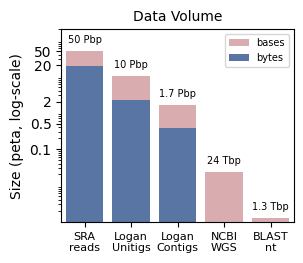

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the bar plot
data = {
    "Category": ["SRA\nreads", "Logan\nUnitigs", "Logan\nContigs","NCBI\nWGS","BLAST\nnt"],
    "Compressed Size (Petabytes)": [19.79, 2.18, 0.385,0,0],  # 385 terabytes converted to petabytes
    "Uncompressed Size (Petabases)": [50.0, 10.39, 1.66,0.024, 0.0013]  
}
# zstdcat Athena_Dec_10_public.csv.zst | awk -F, '{gsub(/"/, "", $1); gsub(/"/, "", $3); print $1"\t"$3}' |grep -v mbases|awk '{s+=$2} END {print s}'
# to get size of contigs before compression:
# SELECT SUM(CAST(size_contigs_before_compression AS bigint)) / 1000000000000.0 AS total_size_contigs_before_compression_in_billions
#FROM "logan-export-athena"."logan_export_parquet"
#WHERE size_contigs_before_compression <> '';

#blasd size: https://www.nlm.nih.gov/ncbi/workshops/2023-08_BLAST_evol/databases.html

df = pd.DataFrame(data)

# Create the figure and axis
plt.figure(figsize=(3, 2.5))

# Plot uncompressed sizes with alpha for shading
uncompressed_barplot = sns.barplot(x="Category", y="Uncompressed Size (Petabases)", data=df, color="#c44e52", alpha=0.5, label="bases")

# Plot compressed sizes
sns.barplot(x="Category", y="Compressed Size (Petabytes)", data=df, color="#4c72b0", label="bytes")


# Add labels and title
plt.title("Data Volume", fontsize=10)
plt.yscale('log')
plt.ylabel("Size (peta, log-scale)", fontsize=10)
plt.yticks([0.1, 0.5, 2, 20, 50], ['0.1', '0.5', '2', '20', '50'])
plt.xticks(fontsize=8)
plt.xlabel("")
plt.legend(title="", fontsize=7, title_fontsize=7)
plt.ylim(0.001, 200)  # Increase the y-axis limit to 200

# Annotate bars with their values
for i,bar in enumerate(uncompressed_barplot.patches[0:5]):
    uncompressed_barplot.annotate(format(bar.get_height()*(1000 if i >= 3 else 1), '.1f' if i in [2,4] else '.0f') + (" Tbp" if i >= 3 else " Pbp"),                                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                                  ha='center', va='center',
                                  size=7, xytext=(0, 8),
                                  textcoords='offset points')

# Save the figure
plt.savefig("dynamodb_tigs_stats.plot_logan_size.svg", format="svg")

# Show the plot
plt.show()


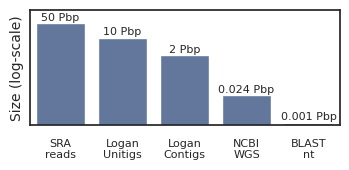

In [42]:
# a more vetically compressed one and removing bytes per Artem requset

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data for the bar plot
data = {
    "Category": ["SRA\nreads", "Logan\nUnitigs", "Logan\nContigs","NCBI\nWGS","BLAST\nnt"],
    "Uncompressed Size (Petabases)": [50.0, 10.39, 1.66,0.024, 0.0013]  
}

df = pd.DataFrame(data)
plt.figure(figsize=(4, 1.5))

# Plot uncompressed sizes with alpha for shading
uncompressed_barplot = sns.barplot(x="Category", y="Uncompressed Size (Petabases)", data=df, color="#5975a4")#, label="bases")


# Add labels and title
#plt.title("Data Volume", fontsize=10)
plt.yscale('log')
plt.ylabel("Size (log-scale)", fontsize=10)
plt.yticks([])#[0.1,  2,  50], ['0.1',  '2', '50'])
plt.xticks(fontsize=8)
plt.xlabel("")
#plt.legend(title="", fontsize=7, title_fontsize=7)
plt.ylim(0.001, 200)  # Increase the y-axis limit to 200

# Annotate bars with their values
for i,bar in enumerate(uncompressed_barplot.patches[0:5]):
    uncompressed_barplot.annotate(format(bar.get_height()*(1), '.3f' if i in [3,4] else '.0f') + (" Pbp"), 
                                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                                  ha='center', va='center',
                                  size=8, xytext=(0, 4),
                                  textcoords='offset points')

# Save the figure
plt.savefig("dynamodb_tigs_stats.plot_logan_size.svg", format="svg")

# Show the plot
plt.show()
